In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


[3.49044830e+01 2.55947039e-04 2.32228754e-03 1.02235458e-01
 4.40549158e-10 6.02942310e-03 1.33628418e+00 3.53295577e+00
 9.99936544e+00]
[3.45876642e+01 2.47817678e-04 2.29470825e-03 9.95250322e-03
 4.47311763e-11 5.44436960e-03 9.17777535e-01 3.42794361e+00
 9.88715841e+00]


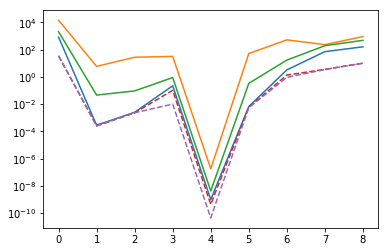

In [4]:
#home = '/Users/nab/Desktop/Projects/Fishcheck/'

#H0,ombh2,omch2,tau,As,ns,mnu,w,wa
f1 = '../datatest/savedFisher_szar_HighEllPlanck_fsky_0.2_mnuwwa_step_0.01.txt'
f2 = '../datatest/savedFisher_szar_LowEllPlanck_fsky_0.6_mnuwwa_step_0.01.txt'
f3 = '../datatest/savedFisher_szar_MidEllPlanck_fsky_0.4_mnuwwa_step_0.01.txt'

Pl1 = np.loadtxt(f1)
Pl2 = np.loadtxt(f2)
Pl3 = np.loadtxt(f3)

p1err = np.sqrt(np.diagonal(np.linalg.inv(Pl1)))
p2err = np.sqrt(np.diagonal(np.linalg.inv(Pl2)))
p3err = np.sqrt(np.diagonal(np.linalg.inv(Pl3)))

Pltot = Pl1+Pl2+Pl3

perr = np.sqrt(np.diagonal(np.linalg.inv(Pltot)))

Pltot[3,3] += (1./0.01)**2

perr_tau = np.sqrt(np.diagonal(np.linalg.inv(Pltot)))

print(perr)
print(perr_tau)

plt.plot(p1err)
plt.plot(p2err)
plt.plot(p3err)
plt.semilogy(perr,'--')
plt.semilogy(perr_tau,'--')

[2.04509355e-01 1.72145902e-04 5.28865543e-04 9.75528934e-03
 4.11420366e-11 3.66506664e-03 3.88585802e-02 8.04158187e-03]
[1.59871287e-01 1.69854655e-04 4.72414502e-04 9.68761630e-03
 4.07697523e-11 3.46027267e-03 3.55698583e-02 5.49838778e-03]


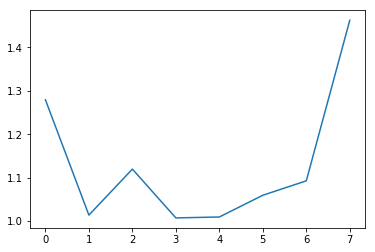

In [12]:
f4 = '../datatest/s4_v3style_40_tsz_counts_no_cmb_no_desi_no_tau_prior_mnu_w_w0.txt'
f5 = '../datatest/so_v3_goal_40_tsz_counts_no_cmb_no_desi_no_tau_prior_mnu_w_w0.txt'

# H0,ombh2,omch2,tau,As,ns,mnu,w0,wa,b_ym,alpha_ym,Ysig,gamma_ym,beta_ym,gammaYsig,betaYsig
# H0,ombh2,omch2,tau,As,ns,mnu,w0,b_ym,alpha_ym,Ysig,gamma_ym,beta_ym,gammaYsig,betaYsig

S4 = np.loadtxt(f4,delimiter=',')
SO = np.loadtxt(f5,delimiter=',')

SO[:9,:9] += Pltot
S4[:9,:9] += Pltot

SOerr = np.sqrt(np.diagonal(np.linalg.inv(SO[:8,:8])))
S4err = np.sqrt(np.diagonal(np.linalg.inv(S4[:8,:8])))

print(SOerr)
print(S4err)

plt.plot(SOerr/S4err)